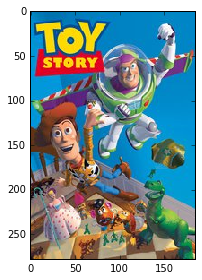

In [9]:
#/usr/bin/env python
#-*- coding:utf-8-*-
import requests
import json
import os
import urllib
import os.path
import pickle
import pandas as pd
from IPython.display import Image
from IPython.display import display
from IPython.display import HTML
import matplotlib.pyplot as plt
from skimage import io
class MovieDisplayer(object):
    def __init__(self,url = 'http://api.themoviedb.org/3',
                    headers = {'Accept':'application/json'},
                    payload = {'api_key':'e0ec617d1ba0c2c3adb4f43df47f9ab4'}):
        self.url = url
        self.headers = headers
        self.payload = payload
        
    def getImageBasePath(self,size='w185'):
        proxies = { "http": "http://localhost:1080", "https": "http://1ocalhost:1080", }   
        response = requests.get(self.url+'/configuration',params=self.payload,headers=self.headers)
        response = json.loads(response.text)
        base_url = response['images']['base_url']+'w185'
        return base_url
    
    def get_poster(self,imdb,base_url):
        #query themovie.org API for movie poster path.
        file_path = ''
        imdb_id = 'tt0{0}'.format(imdb)
        movie_url = self.url+'/movie/{:}/images'.format(imdb_id)
        response = requests.get(movie_url,params=self.payload,headers=self.headers)
        try:
            file_path = json.loads(response.text)['posters'][0]['file_path']
        except:
            print('Failed to get url for imdb: {0}'.format(imdb))
        return base_url+file_path
    
    def displayMoive(self,imdb):
        base_url = self.getImageBasePath()
        image_url = self.get_poster(imdb,base_url)
#         image = ("<img style='width: 100px; margin: 0px; float: left; border: 1px solid black;' src={0} />"
#                 .format(image_url))
#         display(HTML(image))
        image = io.imread(image_url)
        io.imshow(image)
        io.show()

if __name__ == '__main__':        
    movieDisplayer = MovieDisplayer()
    movieDisplayer.displayMoive(114709)